In [5]:
from shapely.geometry import Polygon, MultiPolygon
# from poly_getter import PolyGetter

In [2]:
import math
from shapely.geometry import Polygon, Point

In [3]:
class PolyGetter(object):
    """ 生成正多边形对象
    """

    def __init__(self, radius, k, theta=0):
        self.radius = radius
        self.k = k  # 正多边形的边数
        self.theta = theta  # 起始角度: degree

    def from_center(self, center):
        """ 输入中心点的坐标，返回对应的正多边形
        :param center: Point对象
        """

        def get_xy(i):
            x = center.x + self.radius * math.cos(2 * math.pi * (i / self.k + self.theta / 360))
            y = center.y + self.radius * math.sin(2 * math.pi * (i / self.k + self.theta / 360))
            return x, y

        return Polygon([Point(get_xy(i)) for i in range(self.k)])

    def from_vertex(self, vertex, i):
        """ 输入顶点的坐标，返回对应的多边形
        :param vertex: 顶点坐标，Point对象
        :param i: 顶点的编号（按极坐标顺序编号）
        """
        c_x = vertex.x - self.radius * math.cos(2 * math.pi * i / self.k + self.theta)
        c_y = vertex.y - self.radius * math.sin(2 * math.pi * i / self.k + self.theta)
        return self.from_center(Point(c_x, c_y))

    def neighbors_of(self, poly):
        """ 输入正多边形，返回它所有邻接的多边形
        :param poly: 多边形，Polygon对象
        """
        dist = self.radius * math.cos(math.pi / self.k)  # 计算中心到边的距离
        p = PolyGetter(2 * dist,
                       self.k,
                       self.theta + 180 / self.k)
        centers = list(p.from_center(poly.centroid).exterior.coords)
        return [Polygon(self.from_center(Point(c))) for c in centers]

In [6]:
PolyGetter.neighbors_of

TypeError: __init__() missing 2 required positional arguments: 'radius' and 'k'

In [17]:
import mytools
import geopandas as gpd

In [18]:
tu = gpd.read_file('d:/工作/图层/地市区县/县界.shp',encoding='utf-8')
geo_polygon = tu['geometry'][0]

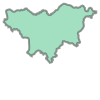

In [20]:
geo_polygon